# Coursera IBM Data Science Capstone Project

### A case study about venues distribution around metro stations in Madrid (Spain)

#### Abstract 
In this notebook we will analyze venue-types around metro stations in Madrid (Spain) with the purpose of helping entrepreneurs looking to open a new restaurant in the city. In order to do so, we will use data related to metro stations available under Madrid's City Hall [website](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=08055cde99be2410VgnVCM1000000b205a0aRCRD&). Once the data is gathered and cleaned, we will use [Foursquare's](https://foursquare.com/) API to obtain venues information. Finally, we will use different Python packages for preparing visualizations and apply machine learning concepts such as clustering.<br><br>
This project is the final assignment of Coursera's IBM Data Science Professional Certificate (you can find more information under the following [link](https://www.coursera.org/professional-certificates/ibm-data-science?utm_source=gg&utm_medium=sem&campaignid=2087860785&utm_content=10-IBM-Data-Science-ROW&adgroupid=79675709431&device=c&keyword=ibm%20data%20science%20coursera&matchtype=b&network=g&devicemodel=&adpostion=1t3&creativeid=375774778792&hide_mobile_promo&gclid=CjwKCAiAj-_xBRBjEiwAmRbqYsz12g6cYE_pmnEmFaYVxuOLu65ZY2JlZpm9-WWyyt1fwOi9ryehCBoCYYMQAvD_BwE)).

#### Introduction to the business problem and who would be interested in this project.
Madrid is the capital of Spain and one of the liveliest European capitals. Its cultural heritage is second to none and its smooth weather makes of this city one of the most attractive tourist destinations in the country. However, if I had to single out one of the things that makes this city unique, I would definitely go for its people. “Madrileños” (or as the locals like to call themselves, los “gatos”), are known for their friendliness, openness, and above all, for enjoying one of the greatest pleasures in life… eating!<br><br>
In this project, we will be exploring the distribution of restaurants around metro stations in Madrid with the purpose of helping future entrepreneurs to locate areas where they could open a new venue. Ideally, we would be interested in finding a spot with a central geographical location where there are not many competitors. However, this is highly unlikely to exist. As such, an alternative would be to identify an area where the number of restaurants is high, as that indicates there is already a high number of potential customers in that zone. This in turn increases the likelihood of people paying a visit into a new venue (provided it has a good reputation and that the food is good).  


#### Data used to solve the problem 
As a first step to address our problem, we collected data regarding metro stations in Madrid which can be accessed directly from [here](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=08055cde99be2410VgnVCM1000000b205a0aRCRD&) under the "Metro" heading. This dataset was compiled by Madrid’s City Hall and is available online for free in their official website under different formats (i.e. RDF, KML and GPX).<br><br>
In order to use the data, I downloaded the RDF file and converted it into excel CSV with the help of an online converter. Once the file type was modified, no further amendments had to be performed and I uploaded it to Jupyter Notebooks from where Python was run.<br><br>
The dataset contains all the metro stations in the center of Madrid together with their geographical coordinates (i.e. latitude and longitude) in DD format (Decimal Degrees). One of the reasons why I found this dataset useful is because the tube is one of the favored transportation means both for locals and tourists in Madrid. With ~[660](https://www.metromadrid.es/es/nota-de-prensa/2019-01-15/metro-celebra-su-centenario-con-record-de-viajeros-en-2018-la-mayor-cifra-de-la-decada) million passenger trips per year, Madrid is heavily reliant on its underground system. As such, anyone looking to open a new venue in this city should, by all means, consider having a metro station nearby.<br><br>
Once we have our original dataset, we combine it with Foursquare's API in order to obtain information about venues. Foursquare is an American technology company with a powerful locations platform and which leverages on data collected via billions of check-ins (for more information about the company, please press [here](https://foursquare.com/)).<br><br>
Gathering high quality data was probably one of the most challenging parts of this project. I initially attempted to perform a similar study by postal codes and neighborhoods but I was not able to identify datasets containing this type of information together with geographical coordinates.<br><br>
The following three sections contain information regarding i) the gathering / cleaning of data, ii) the creation of a new dataframe using Foursquare information and iii) the clustering analysis.

### Part I: Gathering and cleaning up the data

The first step will be to install the packages we'll be using

In [3]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Then we open our dataset:

In [4]:
metro_df = pd.read_csv('Paradas_Metro.csv',skipinitialspace=True)

And we examine it:

In [5]:
metro_df.head()

Point/coordinates               name
0  -3.6452252835565764,\r\n40.389768700352434  1 ALTO DEL ARENAL
1   -3.7033178070796913,\r\n40.45033105413335         1 ALVARADO
2   -3.6993757416732405,\r\n40.41246302818812     1 ANTON MARTIN
3   -3.692490883566612,\r\n40.408846792956474           1 ATOCHA
4   -3.689379993715528,\r\n40.406586090726144     1 ATOCHA RENFE

We change the order of the columns:

In [6]:
metro_df = metro_df[["name","Point/coordinates"]]
metro_df.head()

name                           Point/coordinates
0  1 ALTO DEL ARENAL  -3.6452252835565764,\r\n40.389768700352434
1         1 ALVARADO   -3.7033178070796913,\r\n40.45033105413335
2     1 ANTON MARTIN   -3.6993757416732405,\r\n40.41246302818812
3           1 ATOCHA   -3.692490883566612,\r\n40.408846792956474
4     1 ATOCHA RENFE   -3.689379993715528,\r\n40.406586090726144

We rename the columns:

In [7]:
metro_df.columns = ["Metro_Stop_Name", "Coordinates"]
metro_df.head()

Metro_Stop_Name                                 Coordinates
0  1 ALTO DEL ARENAL  -3.6452252835565764,\r\n40.389768700352434
1         1 ALVARADO   -3.7033178070796913,\r\n40.45033105413335
2     1 ANTON MARTIN   -3.6993757416732405,\r\n40.41246302818812
3           1 ATOCHA   -3.692490883566612,\r\n40.408846792956474
4     1 ATOCHA RENFE   -3.689379993715528,\r\n40.406586090726144

We split the first column in two:

In [8]:
metro_df[['Metro_Line','Metro_Name']] = metro_df["Metro_Stop_Name"].str.split(n=1,expand=True)
metro_df.drop(['Metro_Stop_Name'], axis=1, inplace=True)
metro_df.head()

Coordinates Metro_Line       Metro_Name
0  -3.6452252835565764,\r\n40.389768700352434          1  ALTO DEL ARENAL
1   -3.7033178070796913,\r\n40.45033105413335          1         ALVARADO
2   -3.6993757416732405,\r\n40.41246302818812          1     ANTON MARTIN
3   -3.692490883566612,\r\n40.408846792956474          1           ATOCHA
4   -3.689379993715528,\r\n40.406586090726144          1     ATOCHA RENFE

We split the coordinates column in two:

In [9]:
metro_df[['Longitude','Latitude']] = metro_df["Coordinates"].str.split(",\r\n",n=1,expand=True)
metro_df.drop(['Coordinates'], axis=1, inplace=True)
metro_df.head()

Metro_Line       Metro_Name            Longitude            Latitude
0          1  ALTO DEL ARENAL  -3.6452252835565764  40.389768700352434
1          1         ALVARADO  -3.7033178070796913   40.45033105413335
2          1     ANTON MARTIN  -3.6993757416732405   40.41246302818812
3          1           ATOCHA   -3.692490883566612  40.408846792956474
4          1     ATOCHA RENFE   -3.689379993715528  40.406586090726144

We rename a column:

In [10]:
metro_df.rename(columns={'Metro_name':'Metro_Stop_Name'}, inplace=True)
metro_df.head()

Metro_Line       Metro_Name            Longitude            Latitude
0          1  ALTO DEL ARENAL  -3.6452252835565764  40.389768700352434
1          1         ALVARADO  -3.7033178070796913   40.45033105413335
2          1     ANTON MARTIN  -3.6993757416732405   40.41246302818812
3          1           ATOCHA   -3.692490883566612  40.408846792956474
4          1     ATOCHA RENFE   -3.689379993715528  40.406586090726144

We examine the type of information we have. As we can see, we have objects.<br>
Going forward, we need to work with words and numbers, so we convert the data types of each column.

In [11]:
metro_df.dtypes

Metro_Line    object
Metro_Name    object
Longitude     object
Latitude      object
dtype: object

In [12]:
metro_df["Longitude"] = metro_df["Longitude"].astype(str).astype(float)
metro_df["Latitude"]= metro_df["Latitude"].astype(str).astype(float)
metro_df["Metro_Line"] = metro_df["Metro_Line"].astype(str)
metro_df["Metro_Name"] = metro_df["Metro_Name"].astype(str)

We examine the types of data again:

In [13]:
metro_df.dtypes

Metro_Line     object
Metro_Name     object
Longitude     float64
Latitude      float64
dtype: object

We examine the size of our dataset.
We see below that we have 292 metro stops.

In [14]:
metro_df.shape

(292, 4)

We have 241 unique values, meaning we have 51 repeated stops. This makes sense given that metro lines intersect and a stop appears in different lines.<br>

In [15]:
metro_df.Metro_Name.nunique()

241

We will be dropping the duplicates at this point in time (disregarding which metro line they belong to).

In [19]:
metro_df.drop_duplicates(subset='Metro_Name',inplace=True)

In [20]:
metro_df.shape

(241, 4)

Done! We have our dataset with the name of each metro station together with its line and geographical coordinates!

In [21]:
metro_df.head()

Metro_Line       Metro_Name  Longitude   Latitude
0          1  ALTO DEL ARENAL  -3.645225  40.389769
1          1         ALVARADO  -3.703318  40.450331
2          1     ANTON MARTIN  -3.699376  40.412463
3          1           ATOCHA  -3.692491  40.408847
4          1     ATOCHA RENFE  -3.689380  40.406586

### Part II: Gathering venues with Foursquare's API

We start by installing the necessary packages.

In [22]:
pip install geopy

     |████████████████████████████████| 112kB 12.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import geopy

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


We examine our dataframe again:

In [24]:
print('The dataframe has {} unique metro stops and {} different lines.'.format(
        len(metro_df['Metro_Name'].unique()),
        len(metro_df['Metro_Line'].unique())
    )
)

The dataframe has 241 unique metro stops and 15 different lines.


Then we use geopy library to get the latitude and longitude values of Madrid.<br>
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent madrid_explorer, as shown below.

In [25]:
address = 'Madrid, Spain'

geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


Then we create a map of Madrid using latitude and longitude values and putting the metro stops on top.

In [26]:
map_madrid = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, line, name in zip(metro_df['Latitude'], metro_df['Longitude'], metro_df['Metro_Line'], metro_df['Metro_Name']):
    label = '{}, {}'.format(name, line)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    
map_madrid

Next, we are going to start utilizing the Foursquare API to explore the area around each metro station and segment them.<br>
We do so by defining our Foursquare Credentials and Version.

In [28]:
CLIENT_ID = 'M5LMD3A2CVW4JCHJWUIZOZT0LM3GZ3HTDB0RTJJHJIJXTT0V' # your Foursquare ID
CLIENT_SECRET = 'OITV0TXXBKGCTVMCFWON1UDAY5M2DTQ31ZBQEV13PN044SMG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M5LMD3A2CVW4JCHJWUIZOZT0LM3GZ3HTDB0RTJJHJIJXTT0V
CLIENT_SECRET:OITV0TXXBKGCTVMCFWON1UDAY5M2DTQ31ZBQEV13PN044SMG


Let's explore the first metro stop in our dataframe.

In [29]:
metro_df.loc[0, 'Metro_Name']

'ALTO DEL ARENAL'

Now let's get the metro stop latitude and longitude values.

In [30]:
metro_latitude = metro_df.loc[0, 'Latitude'] # neighbourhood latitude value
metro_longitude = metro_df.loc[0, 'Longitude'] # neighbourhood longitude value

metro_name = metro_df.loc[0, 'Metro_Name'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(metro_name, 
                                                               metro_latitude, 
                                                               metro_longitude))

Latitude and longitude values of ALTO DEL ARENAL are 40.389768700352434, -3.6452252835565764.


Now, let's get the top 100 venues that around the metro stop "Alto del Arenal" within a radius of 500 meters.<br>
To do so, we first need to create the GET request URL and name the URL url.

In [31]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
 
radius = 500 # define radius
 
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    metro_latitude, 
    metro_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M5LMD3A2CVW4JCHJWUIZOZT0LM3GZ3HTDB0RTJJHJIJXTT0V&client_secret=OITV0TXXBKGCTVMCFWON1UDAY5M2DTQ31ZBQEV13PN044SMG&v=20180605&ll=40.389768700352434,-3.6452252835565764&radius=500&limit=100'

Then we send the GET request and examine the results.

In [32]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e3f050e9da7ee001bdf0502'},
 'response': {'headerLocation': 'Puente de Vallecas',
  'headerFullLocation': 'Puente de Vallecas, Madrid',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 40.394268704852436,
    'lng': -3.6393281146330114},
   'sw': {'lat': 40.38526869585243, 'lng': -3.6511224524801413}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dea9bee18386283a3ea27cb',
       'name': 'Heladeria Capri',
       'location': {'address': 'Av de Pablo Neruda, 20-24',
        'lat': 40.3909199520202,
        'lng': -3.642802752166333,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.3909199520202,
          'lng': -3.642802752166333}],
        'distance': 242,
 

From the Foursquare lab in the previous module, we know that all the information is in the items key.<br>
Before we proceed, let's borrow the get_category_type function from the Foursquare lab.<br>
That function will help us extract the category of the venues around each metro station.

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [34]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name    categories        lat       lng
0         Heladeria Capri  Dessert Shop  40.390920 -3.642803
1        El Alto Parrilla     BBQ Joint  40.391070 -3.650203
2         Stones Rock Bar           Bar  40.391972 -3.649905
3           Parque Azorín          Park  40.390675 -3.645530
4  Cafeteria Papalaguinda          Café  40.391073 -3.641219

And how many venues were returned by Foursquare in this particular case?

In [35]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


Now we are going to explore all the metro stations in Madrid the same way.<br> 
Let's create a function to repeat the same process.

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Metro_Name', 
                  'Metro Latitude', 
                  'Metro Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now we write the code to run the above function on each metro station and create a new dataframe called madrid_venues.

In [37]:
# type your answer here

madrid_venues = getNearbyVenues(names=metro_df['Metro_Name'],
                                   latitudes=metro_df['Latitude'],
                                   longitudes=metro_df['Longitude'])

ALTO DEL ARENAL
ALVARADO
ANTON MARTIN
ATOCHA
ATOCHA RENFE
BAMBU
BILBAO
BUENOS AIRES
CHAMARTIN
CONGOSTO
CUATRO CAMINOS
ESTRECHO
GRAN VIA
IGLESIA
LA GAVIA
LAS SUERTES
MENENDEZ PELAYO
MIGUEL HERNANDEZ
NUEVA NUMANCIA
PACIFICO
PINAR DE CHAMARTIN
PLAZA DE CASTILLA
PORTAZGO
PUENTE DE VALLECAS
RIOS ROSAS
SIERRA DE GUADALUPE
SOL
TETUAN
TIRSO DE MOLINA
TRIBUNAL
VALDEACEDERAS
VALDECARROS
VILLA DE VALLECAS
ALONSO MARTINEZ
AVIACION ESPANOLA
BATAN
BEGONA
CASA DE CAMPO
COLONIA JARDIN
CUATRO VIENTOS
CUZCO
FUENCARRAL
GREGORIO MARANON
JOAQUIN VILUMBRALES
LAGO
NUEVOS MINISTERIOS
PLAZA DE ESPANA
PRINCIPE PIO
PUERTA DEL SUR
SANTIAGO BERNABEU
TRES OLIVOS
BAUNATAL
HOSPITAL INFANTA SOFIA
LA GRANJA
LA MORALEJA
LAS TABLAS
MANUEL DE FALLA
MARQUES DE LA VALDAVIA
MONTECARMELO
REYES CATOLICOS
RONDA DE LA COMUNICACION
ABRANTES
CARABANCHEL ALTO
LA FORTUNA
LA PESETA
PAN BENDITO
PLAZA ELIPTICA
SAN FRANCISCO
ALCORCON CENTRAL
ALONSO DE MENDOZA
ARROYO CULEBRO
CASA DEL RELOJ
CONSERVATORIO
EL BERCIAL
EL CARRASCAL
EL CASAR
F

Let's check the size of the resulting dataframe.

In [38]:
print(madrid_venues.shape)
madrid_venues.head()

(7890, 7)


Metro_Name  Metro Latitude  Metro Longitude                   Venue  \
0  ALTO DEL ARENAL       40.389769        -3.645225         Heladeria Capri   
1  ALTO DEL ARENAL       40.389769        -3.645225        El Alto Parrilla   
2  ALTO DEL ARENAL       40.389769        -3.645225         Stones Rock Bar   
3  ALTO DEL ARENAL       40.389769        -3.645225           Parque Azorín   
4  ALTO DEL ARENAL       40.389769        -3.645225  Cafeteria Papalaguinda   

   Venue Latitude  Venue Longitude Venue Category  
0       40.390920        -3.642803   Dessert Shop  
1       40.391070        -3.650203      BBQ Joint  
2       40.391972        -3.649905            Bar  
3       40.390675        -3.645530           Park  
4       40.391073        -3.641219           Café

Just for the record, there are 312 different types of venues.

Let's check how many venues were returned for each metro station.

In [39]:
madrid_venues.groupby('Metro_Name').count()

Metro Latitude  Metro Longitude  Venue  \
Metro_Name                                                            
ABRANTES                                  7                7      7   
ACACIAS                                  33               33     33   
AEROPUERTO T1 T2 T3                      31               31     31   
AEROPUERTO T4                            36               36     36   
ALAMEDA DE OSUNA                         23               23     23   
ALCORCON CENTRAL                          9                9      9   
ALFONSO XIII                             56               56     56   
ALMENDRALES                              18               18     18   
ALONSO CANO                              56               56     56   
ALONSO DE MENDOZA                         6                6      6   
ALONSO MARTINEZ                          95               95     95   
ALSACIA                                  18               18     18   
ALTO DE EXTREMADURA                      14               14     14   
ALTO DEL ARENAL                           8                8      8   
ALUCHE                                   21               21     21   
ALVARADO                                 40               40     40   
ANTON MARTIN                            100              100    100   
ANTONIO MACHADO                           9                9      9   
ARGANDA DEL REY                          10               10     10   
ARGANZUELA-PLANETARIO                    38               38     38   
ARGUELLES                                64               64     64   
ARROYO CULEBRO                            4                4      4   
ARTILLEROS                               11               11     11   
ARTURO SORIA                             23               23     23   
ASCAO                                    11               11     11   
ATOCHA                                   58               58     58   
ATOCHA RENFE                             57               57     57   
AVDA. DE LA ILUSTRACION                  15               15     15   
AVENIDA DE AMERICA                       43               43     43   
AVENIDA DE GUADALAJARA                   10               10     10   
AVENIDA DE LA PAZ                        18               18     18   
AVIACION ESPANOLA                         6                6      6   
BAMBU                                     8                8      8   
BANCO DE ESPANA                         100              100    100   
BARAJAS                                  21               21     21   
BARRIO DE LA CONCEPCION                  23               23     23   
BARRIO DEL PILAR                         34               34     34   
BARRIO DEL PUERTO                        15               15     15   
BATAN                                    12               12     12   
BAUNATAL                                  9                9      9   
BEGONA                                   12               12     12   
BILBAO                                  100              100    100   
BUENOS AIRES                             13               13     13   
CALLAO                                  100              100    100   
CAMPAMENTO                               11               11     11   
CAMPO DE LAS NACIONES                    15               15     15   
CANAL                                    70               70     70   
CANILLAS                                 44               44     44   
CANILLEJAS                               12               12     12   
CARABANCHEL                              18               18     18   
CARABANCHEL ALTO                         11               11     11   
CARPETANA                                11               11     11   
CARTAGENA                                34               34     34   
CASA DE CAMPO                             4                4      4   
CASA DEL RELOJ                           10          

Let's find out how many unique categories can be curated from all the returned venues.

In [40]:
print('There are {} uniques categories.'.format(len(madrid_venues['Venue Category'].unique())))

There are 318 uniques categories.


Now we will analyze each metro station.<br>
We will be counting the type of venue there is in each metro stop and count them.

In [41]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
madrid_onehot['Metro_Name'] = madrid_venues['Metro_Name'] 

# move neighbourhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head()

Metro_Name  Accessories Store  Adult Boutique  Airport  Airport Gate  \
0  ALTO DEL ARENAL                  0               0        0             0   
1  ALTO DEL ARENAL                  0               0        0             0   
2  ALTO DEL ARENAL                  0               0        0             0   
3  ALTO DEL ARENAL                  0               0        0             0   
4  ALTO DEL ARENAL                  0               0        0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Auto Garage  Automotive Shop  \
0                   0                0            0                0   
1                   0                0            0                0   
2                   0                0            0                0   
3                   0                0            0                0   
4                   0                0            0                0   

   BBQ Joint  Bagel Shop  Bakery  Bar  Baseball Stadium  Basketball Court  \
0          0           0       0    0                 0                 0   
1          1           0       0    0                 0                 0   
2          0           0       0    1                 0                 0   
3          0           0       0    0                 0                 0   
4          0           0       0    0                 0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                   0      0                0         0            0   
1                   0      0                0         0            0   
2                   0      0                0         0            0   
3                   0      0                0         0            0   
4                   0      0                0         0            0   

   Beer Store  Big Box Store  Bistro  Board Shop  Bookstore  Boutique  \
0           0              0       0           0          0         0   
1           0              0       0           0          0         0   
2           0              0       0           0          0         0   
3           0              0       0           0          0         0   
4           0              0       0           0          0         0   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0           0                     0               0        0   
1              0           0                     0               0        0   
2              0           0                     0               0        0   
3              0           0                     0               0        0   
4              0       

Let's examine the resulting dataframe.

In [42]:
madrid_onehot.shape

(7890, 319)

We are going to check the most recurrent categories

In [43]:
madrid_onehot_sum = madrid_onehot.append(madrid_onehot.agg(['sum', 'mean']))

In [44]:
madrid_onehot_sum.tail(5)

Metro_Name  Accessories Store  \
7887                                  RIVAS VACIAMADRID           0.000000   
7888                                  RIVAS VACIAMADRID           0.000000   
7889                                  RIVAS VACIAMADRID           0.000000   
sum   ALTO DEL ARENALALTO DEL ARENALALTO DEL ARENALA...          14.000000   
mean                                                NaN           0.001774   

      Adult Boutique   Airport  Airport Gate  Airport Lounge  Airport Service  \
7887        0.000000  0.000000      0.000000        0.000000         0.000000   
7888        0.000000  0.000000      0.000000        0.000000         0.000000   
7889        0.000000  0.000000      0.000000        0.000000         0.000000   
sum         1.000000  2.000000      2.000000        4.000000        10.000000   
mean        0.000127  0.000253      0.000253        0.000507         0.001267   

      Airport Terminal  American Restaurant   Arcade  Arepa Restaurant  \
7887          0.000000             0.000000  0.00000          0.000000   
7888          0.000000             0.000000  0.00000          0.000000   
7889          0.000000             0.000000  0.00000          0.000000   
sum           5.000000            54.000000  6.00000          5.000000   
mean          0.000634             0.006844  0.00076          0.000634   

      Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
7887                0.000000     0.000000    0.000000              0.00000   
7888                0.000000     0.000000    0.000000              0.00000   
7889                0.000000     0.000000    0.000000              0.00000   
sum                42.000000    34.000000   27.000000              3.00000   
mean                0.005323     0.004309    0.003422              0.00038   

      Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
7887              0.000000          0.000000            0.000000   
7888              0.000000          0.000000            0.000000   
7889              0.000000          0.000000            0.000000   
sum               4.000000         75.000000           21.000000   
mean              0.000507          0.009506            0.002662   

      Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Bagel Shop  \
7887         0.000000     0.000000         0.000000   0.000000    0.000000   
7888         0.000000     0.000000         0.000000   0.000000    0.000000   
7889         0.000000     1.000000         0.000000   0.000000    0.000000   
sum          1.000000     2.000000         1.000000  33.000000    2.000000   
mean         0.000127     0.000253         0.000127   0.004183    0.000253   

         Bakery         Bar  Baseball Stadium  Basketball Court  \
7887    0.00000    0.000000          0.000000          0.000000   
7888    0.00000    0.000000          0.000000          0.000000   
7889    0.00000    0.000000          0.000000          0.000000   
sum   169.00000  357.000000          1.000000          8.000000   
mean    0.02142    0.045247          0.000127          0.001014   

      Basketball Stadium     Beach  Bed & Breakfast   Beer Bar  Beer Garden  \
7887            0.000000  0.000000         0.000000   0.000000     0.000000   
7888            0.000000  0.000000         0.000000   0.000000     0.000000   
7889            0.000000  0.000000         0.000000   0.000000     0.000000   
sum             4.000000  1.000000         4.000000  30.000000    33.000000   
mean            0.000507  0.000127         0.000507   0.003802     0.004183   

      Beer Store  Big Box Store     Bistro  Board Shop  Bookstore   Boutique  \
7887     0.00000       0.000000   0.000000     0.00000   0.000000   0.000000   
7888     0.00000       0.000000   0.000000     0.00000   0.000000   0.000000   
7889     0.00000       0.000000   0.000000     0.00000   0.000000   0.000000   
sum      6.00000      10.000000  28.000000     3.00000  69.000000  28.000000   
mean     0.00076   

We isolate the rows we need.

In [45]:
most_common_venues_df = madrid_onehot_sum.iloc[[-2]]
most_common_venues_df.head()

Metro_Name  Accessories Store  \
sum  ALTO DEL ARENALALTO DEL ARENALALTO DEL ARENALA...               14.0   

     Adult Boutique  Airport  Airport Gate  Airport Lounge  Airport Service  \
sum             1.0      2.0           2.0             4.0             10.0   

     Airport Terminal  American Restaurant  Arcade  Arepa Restaurant  \
sum               5.0                 54.0     6.0               5.0   

     Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
sum                    42.0         34.0        27.0                  3.0   

     Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
sum                   4.0              75.0                21.0   

     Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Bagel Shop  \
sum              1.0          2.0              1.0       33.0         2.0   

     Bakery    Bar  Baseball Stadium  Basketball Court  Basketball Stadium  \
sum   169.0  357.0               1.0               8.0                 4.0   

     Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
sum    1.0              4.0      30.0         33.0         6.0           10.0   

     Bistro  Board Shop  Bookstore  Boutique  Bowling Alley  Boxing Gym  \
sum    28.0         3.0       69.0      28.0            3.0         3.0   

     Brazilian Restaurant  Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  \
sum                   9.0            54.0     74.0     2.0              1.0   

     Buffet  Building  Burger Joint  Burrito Place  Bus Station  Butcher  \
sum     2.0       5.0         118.0           15.0          7.0      2.0   

     Cafeteria   Café  Cajun / Creole Restaurant  Camera Store  Candy Store  \
sum        8.0  236.0                        4.0           3.0          4.0   

     Casino  Cheese Shop  Chinese Restaurant  Chocolate Shop  Church  Circus  \
sum     7.0          6.0                77.0             3.0     8.0     4.0   

     City Hall  Clothing Store  Cocktail Bar  Coffee Shop  \
sum        1.0            79.0          81.0        192.0   

     College Administrative Building  College Auditorium  College Gym  \
sum                              1.0                 1.0          1.0   

     College Residence Hall  Colombian Restaurant  Comedy Club  \
sum                     1.0                   2.0          7.0   

     Comfort Food Restaurant  Comic Shop  Concert Hall  Convenience Store  \
sum                      6.0         5.0          21.0               27.0   

     Convention Center  Cosmetics Shop  Coworking Space  Creperie  \
sum                1.0            26.0              2.0      10.0   

     Cuban Restaurant  Cupcake Shop  Dance Studio  Deli / Bodega  \
sum               5.0           5.0           2.0           28.0   

     Department Store  Design Studio  Dessert Shop  Dim Sum Restaurant  Diner  \
sum              37.0            1.0          27.0                 1.0   42.0   

     Disc Golf  Discount Store  Dive Shop  Dive Spot  Dog Run  Donut Shop  \
sum        1.0             4.0        1.0        1.0      1.0         9.0   

     Dumpling Restaurant  Duty-free Shop  Eastern European Restaurant  \
sum                  3.0             3.0                          2.0   

     Electronics Store  Embassy / Consulate  Ethiopian Restaurant  \
sum               32.0                  2.0                   2.0   

     Event Space  Exhibit  Fabric Shop  Falafel Restaurant  Farmers Market  \
sum          5.0      3.0          2.0                11.0            28.0   

     Fast Food Restaurant  Financial or Legal Service  Fish & Chips Shop  \
sum                  72.0                         1.0                2.0   

     Fish Market  Flea Market  Flower Shop  Food  Food & Drink Shop  \
sum          2.0         13.0          7.0   9.0               30.0   

     Food Court  Food Truck  Football Stadium  Fountain  French Restaurant  \
sum         3.0         9.0               1.0       1.0             

Let visualize with boxplots the 10 most recurrent type of venues around metro stations en Madrid.
We'll clean the data and create an horizontal barchart.

In [46]:
most_common_venues_df.drop(['Metro_Name'], axis=1, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
most_common_venues_df.head()

Accessories Store  Adult Boutique  Airport  Airport Gate  Airport Lounge  \
sum               14.0             1.0      2.0           2.0             4.0   

     Airport Service  Airport Terminal  American Restaurant  Arcade  \
sum             10.0               5.0                 54.0     6.0   

     Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
sum               5.0                    42.0         34.0        27.0   

     Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
sum                  3.0                   4.0              75.0   

     Athletics & Sports  Auto Dealership  Auto Garage  Automotive Shop  \
sum                21.0              1.0          2.0              1.0   

     BBQ Joint  Bagel Shop  Bakery    Bar  Baseball Stadium  Basketball Court  \
sum       33.0         2.0   169.0  357.0               1.0               8.0   

     Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
sum                 4.0    1.0              4.0      30.0         33.0   

     Beer Store  Big Box Store  Bistro  Board Shop  Bookstore  Boutique  \
sum         6.0           10.0    28.0         3.0       69.0      28.0   

     Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
sum            3.0         3.0                   9.0            54.0     74.0   

     Bridge  Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  \
sum     2.0              1.0     2.0       5.0         118.0           15.0   

     Bus Station  Butcher  Cafeteria   Café  Cajun / Creole Restaurant  \
sum          7.0      2.0        8.0  236.0                        4.0   

     Camera Store  Candy Store  Casino  Cheese Shop  Chinese Restaurant  \
sum           3.0          4.0     7.0          6.0                77.0   

     Chocolate Shop  Church  Circus  City Hall  Clothing Store  Cocktail Bar  \
sum             3.0     8.0     4.0        1.0            79.0          81.0   

     Coffee Shop  College Administrative Building  College Auditorium  \
sum        192.0                              1.0                 1.0   

     College Gym  College Residence Hall  Colombian Restaurant  Comedy Club  \
sum          1.0                     1.0                   2.0          7.0   

     Comfort Food Restaurant  Comic Shop  Concert Hall  Convenience Store  \
sum                      6.0         5.0          21.0               27.0   

     Convention Center  Cosmetics Shop  Coworking Space  Creperie  \
sum                1.0            26.0              2.0      10.0   

     Cuban Restaurant  Cupcake Shop  Dance Studio  Deli / Bodega  \
sum               5.0           5.0           2.0           28.0   

     Department Store  Design Studio  Dessert Shop  Dim Sum Restaurant  Diner  \
sum              37.0            1.0          27.0                 1.0   42.0   

     Disc Golf  Discount Store  Dive Shop  Dive Spot  Dog Run  Donut Shop  \
sum        1.0             4.0        1.0        1.0      1.0         9.0   

     Dumpling Restaurant  Duty-free Shop  Eastern European Restaurant  \
sum                  3.0             3.0                          2.0   

     Electronics Store  Embassy / Consulate  Ethiopian Restaurant  \
sum               32.0                  2.0                   2.0   

     Event Space  Exhibit  Fabric Shop  Falafel Restaurant  Farmers Market  \
sum          5.0      3.0          2.0                11.0            28.0   

     Fast Food Restaurant  Financial or Legal Service  Fish & Chips Shop  \
sum                  72.0                         1.0                2.0   

     Fish Market  Flea Market  Flower Shop  Food  Food & Drink Shop  \
sum          2.0         13.0          7.0   9.0               30.0   

     Food Court  Food Truck  Football Stadium  Fountain  French Restaurant  \
sum         3.0         9.0               1.0       1.0               11.0   

     Fried Chicken Joint  Frozen Yogurt Shop  Fruit & Vegetable Sto

In [48]:
most_common_venues_df = most_common_venues_df[most_common_venues_df.iloc[-1,:].sort_values(ascending=False).index]
most_common_venues_df.head()

Spanish Restaurant  Restaurant    Bar  Tapas Restaurant  Hotel   Café  \
sum               799.0       491.0  357.0             351.0  293.0  236.0   

     Plaza  Coffee Shop  Pizza Place  Bakery  Italian Restaurant  \
sum  203.0        192.0        170.0   169.0               159.0   

     Grocery Store  Supermarket  Burger Joint  Mediterranean Restaurant  \
sum          133.0        119.0         118.0                     117.0   

     Japanese Restaurant  Park  Gym / Fitness Center  Seafood Restaurant  \
sum                109.0  97.0                  88.0                86.0   

     Cocktail Bar   Pub  Ice Cream Shop  Clothing Store  Chinese Restaurant  \
sum          81.0  81.0            81.0            79.0                77.0   

     Asian Restaurant   Gym  Brewery  Metro Station  Fast Food Restaurant  \
sum              75.0  75.0     74.0           73.0                  72.0   

     Bookstore  Sandwich Place  Mexican Restaurant  Theater  \
sum       69.0            68.0                67.0     63.0   

     American Restaurant  Breakfast Spot  Gastropub  Nightclub  Diner  \
sum                 54.0            54.0       53.0       46.0   42.0   

     Argentinian Restaurant  Sushi Restaurant  Hostel  \
sum                    42.0              40.0    40.0   

     Vegetarian / Vegan Restaurant  Department Store  Snack Place  \
sum                           40.0              37.0         34.0   

     Art Gallery  Beer Garden  BBQ Joint  Sporting Goods Shop  Gourmet Shop  \
sum         34.0         33.0       33.0                 33.0          32.0   

     Electronics Store  Indian Restaurant  Peruvian Restaurant  Beer Bar  \
sum               32.0               32.0                 30.0      30.0   

     Market  Food & Drink Shop  Train Station  Deli / Bodega  Boutique  \
sum    30.0               30.0           30.0           28.0      28.0   

     Farmers Market  Bistro  Soccer Field  Wine Bar  Art Museum  \
sum            28.0    28.0          28.0      28.0        27.0   

     Convenience Store  Dessert Shop  Cosmetics Shop  Furniture / Home Store  \
sum               27.0          27.0            26.0                    26.0   

     Shopping Mall  Gift Shop  Multiplex  Paella Restaurant  Steakhouse  \
sum           24.0       24.0       23.0               23.0        23.0   

     Museum  Concert Hall  Athletics & Sports  Lounge  Pharmacy  \
sum    22.0          21.0                21.0    20.0      20.0   

     Toy / Game Store  Movie Theater  Garden  Burrito Place  Music Venue  \
sum              19.0           18.0    16.0           15.0         15.0   

      Spa  Thai Restaurant  Rock Club  Performing Arts Venue  Shoe Store  \
sum  15.0             15.0       14.0                   14.0        14.0   

     Korean Restaurant  Accessories Store  Playground  History Museum  \
sum               14.0               14.0        13.0            13.0   

     Hobby Shop  Flea Market  Miscellaneous Shop  Pastry Shop  \
sum        13.0         13.0                13.0         13.0   

     Fried Chicken Joint  Pool  Tea Room  Liquor Store  \
sum                 12.0  12.0      11.0          11.0   

     Middle Eastern Restaurant  Juice Bar  Jazz Club  General Entertainment  \
sum                       11.0       11.0       11.0                   11.0   

     Falafel Restaurant  Pet Store  French Restaurant  Gymnastics Gym  \
sum                11.0       11.0               11.0            11.0   

     Creperie  Airport Service  Monument / Landmark  Frozen Yogurt Shop  \
sum      10.0             10.0                 10.0                10.0   

     Latin American Restaurant  Greek Restaurant  Soccer Stadium  \
sum                       10.0              10.0            10.0   

     Big Box Store  Brazilian Restaurant  Mobile Phone Shop  Food  Food Truck  \
sum           10.0                   9.0                9.0   9.0         9.0   

     Salad Place  Donut Shop  Cafeteria  Kebab Restaurant  Churc

In [49]:
most_common_venues_df.drop(most_common_venues_df.iloc[:, 10:], axis=1, inplace=True)

In [50]:
most_common_venues_df=most_common_venues_df[most_common_venues_df.iloc[-1,:].sort_values(ascending=False).index]

In [51]:
most_common_venues_df.head()

Spanish Restaurant  Restaurant    Bar  Tapas Restaurant  Hotel   Café  \
sum               799.0       491.0  357.0             351.0  293.0  236.0   

     Plaza  Coffee Shop  Pizza Place  Bakery  
sum  203.0        192.0        170.0   169.0

In [52]:
most_common_venues_df = most_common_venues_df.T
most_common_venues_df.reset_index(inplace=True)
most_common_venues_df

index    sum
0  Spanish Restaurant  799.0
1          Restaurant  491.0
2                 Bar  357.0
3    Tapas Restaurant  351.0
4               Hotel  293.0
5                Café  236.0
6               Plaza  203.0
7         Coffee Shop  192.0
8         Pizza Place  170.0
9              Bakery  169.0

In [53]:
most_common_venues_df.columns = ["Venue", "Total"]
most_common_venues_df["Total"]= most_common_venues_df["Total"].astype(int)
most_common_venues_df

Venue  Total
0  Spanish Restaurant    799
1          Restaurant    491
2                 Bar    357
3    Tapas Restaurant    351
4               Hotel    293
5                Café    236
6               Plaza    203
7         Coffee Shop    192
8         Pizza Place    170
9              Bakery    169

Let's visualize this

Text(0, 0.5, 'Venue')

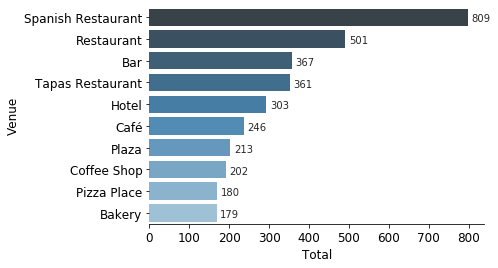

In [54]:
plot=sns.barplot(most_common_venues_df['Total'], most_common_venues_df['Venue'], palette='Blues_d')
#sns.set(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
for p in plot.patches:
    width = 10 + p.get_width()
    plot.text(width -1.5,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:.0f}'.format(width),
            ha="left")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("Total",size = 12)
plt.ylabel("Venue",size = 12)

Next, let's group rows by metro line and by taking the mean of the frequency of occurrence of each category.

In [55]:
madrid_grouped = madrid_onehot.groupby('Metro_Name').mean().reset_index()
madrid_grouped

Metro_Name  Accessories Store  Adult Boutique   Airport  \
0                       ABRANTES           0.000000            0.00  0.000000   
1                        ACACIAS           0.000000            0.00  0.000000   
2            AEROPUERTO T1 T2 T3           0.000000            0.00  0.032258   
3                  AEROPUERTO T4           0.027778            0.00  0.027778   
4               ALAMEDA DE OSUNA           0.000000            0.00  0.000000   
5               ALCORCON CENTRAL           0.000000            0.00  0.000000   
6                   ALFONSO XIII           0.000000            0.00  0.000000   
7                    ALMENDRALES           0.000000            0.00  0.000000   
8                    ALONSO CANO           0.000000            0.00  0.000000   
9              ALONSO DE MENDOZA           0.000000            0.00  0.000000   
10               ALONSO MARTINEZ           0.000000            0.00  0.000000   
11                       ALSACIA           0.000000            0.00  0.000000   
12           ALTO DE EXTREMADURA           0.000000            0.00  0.000000   
13               ALTO DEL ARENAL           0.000000            0.00  0.000000   
14                        ALUCHE           0.000000            0.00  0.000000   
15                      ALVARADO           0.000000            0.00  0.000000   
16                  ANTON MARTIN           0.000000            0.00  0.000000   
17               ANTONIO MACHADO           0.000000            0.00  0.000000   
18               ARGANDA DEL REY           0.000000            0.00  0.000000   
19         ARGANZUELA-PLANETARIO           0.000000            0.00  0.000000   
20                     ARGUELLES           0.000000            0.00  0.000000   
21                ARROYO CULEBRO           0.000000            0.00  0.000000   
22                    ARTILLEROS           0.000000            0.00  0.000000   
23                  ARTURO SORIA           0.000000            0.00  0.000000   
24                         ASCAO           0.000000            0.00  0.000000   
25                        ATOCHA           0.000000            0.00  0.000000   
26                  ATOCHA RENFE           0.000000            0.00  0.000000   
27       AVDA. DE LA ILUSTRACION           0.000000            0.00  0.000000   
28            AVENIDA DE AMERICA           0.000000            0.00  0.000000   
29        AVENIDA DE GUADALAJARA           0.000000            0.00  0.000000   
30             AVENIDA DE LA PAZ           0.000000            0.00  0.000000   
31             AVIACION ESPANOLA           0.000000            0.00  0.000000   
32                         BAMBU           0.000000            0.00  0.000000   
33               BANCO DE ESPANA           0.000000            0.00  0.000000   
34                       BARAJAS           0.000000            0.00  0.000000   
35       BARRIO DE LA CONCEPCION           0.000000            0.00  0.000000   
36              BARRIO DEL PILAR           0.000000            0.00  0.000000   
37             BARRIO DEL PUERTO           0.000000            0.00  0.000000   
38                         BATAN           0.000000            0.00  0.000000   
39                      BAUNATAL           0.000000            0.00  0.000000   
40                        BEGONA           0.000000            0.00  0.000000   
41                        BILBAO           0.000000            0.00  0.000000   
42                  BUENOS AIRES           0.000000            0.00  0.000000   
43                        CALLAO           0.010000            0.00  0.000000   
44                    CAMPAMENTO           0.000000            0.00  0.000000   
45         CAMPO DE LAS NACIONES           0.000000            0.00  0.000000   
46                         CANAL           0.000000            0.00  0.000000   
47                      CANILLAS           0.000000            0.00  0.000000   
48                    CANILLEJAS           0.000000  

Let's confirm the new size to ensure we have 241 rows for each of the unique metro stations.

In [56]:
madrid_grouped.shape

(241, 319)

Let's print each metro station along with the top 5 most common venues.

In [57]:
num_top_venues = 5

for hood in madrid_grouped['Metro_Name']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['Metro_Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ABRANTES----
                  venue  freq
0           Pizza Place  0.14
1  Fast Food Restaurant  0.14
2  Gym / Fitness Center  0.14
3    Athletics & Sports  0.14
4                  Park  0.14


----ACACIAS----
                venue  freq
0    Tapas Restaurant  0.09
1         Art Gallery  0.09
2         Pizza Place  0.06
3                 Bar  0.06
4  Spanish Restaurant  0.06


----AEROPUERTO T1 T2 T3----
              venue  freq
0   Airport Service  0.13
1  Airport Terminal  0.13
2    Duty-free Shop  0.10
3              Café  0.06
4    Airport Lounge  0.06


----AEROPUERTO T4----
                  venue  freq
0       Airport Service  0.17
1    Spanish Restaurant  0.08
2   Rental Car Location  0.06
3  Fast Food Restaurant  0.06
4           Coffee Shop  0.06


----ALAMEDA DE OSUNA----
                venue  freq
0          Smoke Shop  0.09
1    Tapas Restaurant  0.09
2          Restaurant  0.09
3               Hotel  0.09
4  Italian Restaurant  0.04


----ALCORCON CENTRAL----
     

Now we will put all this into a pandas dataframe. First, let's write a function to sort the metro stations in descending order.

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each metro station.

In [59]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Metro_Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Metro_Name'] = madrid_grouped['Metro_Name']

for ind in np.arange(madrid_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

Metro_Name 1st Most Common Venue 2nd Most Common Venue  \
0             ABRANTES                  Park  Fast Food Restaurant   
1              ACACIAS      Tapas Restaurant           Art Gallery   
2  AEROPUERTO T1 T2 T3       Airport Service      Airport Terminal   
3        AEROPUERTO T4       Airport Service    Spanish Restaurant   
4     ALAMEDA DE OSUNA                 Hotel            Smoke Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0  Gym / Fitness Center    Athletics & Sports          Soccer Field  
1                   Bar           Pizza Place    Spanish Restaurant  
2        Duty-free Shop                  Café        Airport Lounge  
3   Rental Car Location           Coffee Shop        Airport Lounge  
4      Tapas Restaurant            Restaurant        Breakfast Spot

That's it! We have each metro station with the 5 most common types of venues! We can proceed to the last part of the project, the cluster analysis.

### Part III: Cluster analysis

In this last part of the project, we are going to perform our cluster analysis by metro station.<br>
We start by running the k-means methodology to cluster the neighborhood into 5 clusters (we choose this randomnly although in later steps we'll study the optimal number of clusters to use).

In [60]:
# set number of clusters
kclusters = 5

madrid_grouped_clustering = madrid_grouped.drop('Metro_Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 2, 2, 1, 2, 2, 2, 1], dtype=int32)

There might be a more optimal way of clustering.<br>
Fortunately, Python has a way to do this with the "Elbow method".
We will create a chart and wherever we see the first large change of the slope of the line is where the optimal number of clusters is.<br>
In this case, we see the elbow takes place when K = 5.

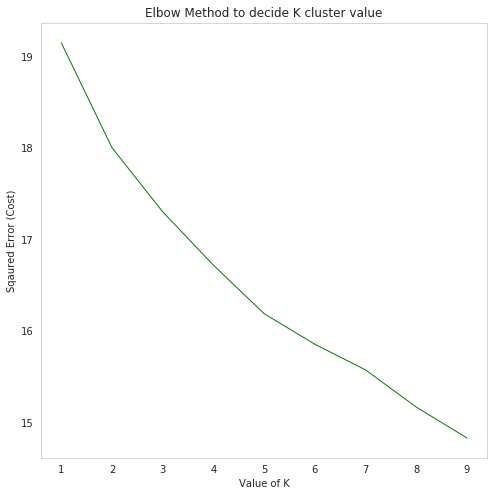

In [61]:
#Then we use the elbow method to see the optimal number of clusters
madrid_grouped_clustering = madrid_grouped.drop('Metro_Name', 1)
cost =[] 
for i in range(1, 10): 
    KM = KMeans(n_clusters=i, max_iter = 100).fit(madrid_grouped_clustering)
    
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 10})
plt.title('Elbow Method to decide K cluster value')
plt.plot(range(1, 10), cost, color ='g', linewidth ='1') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

Given that the chart above shows we should use 4 clusters, we run our previous step again to reclassify all metro stations in 4 clusters.

In [62]:
# set number of clusters
kclusters = 5

madrid_grouped_clustering = madrid_grouped.drop('Metro_Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 2, 2, 1, 2, 2, 2, 1], dtype=int32)

Then we create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [63]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

madrid_merged = metro_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighbourhoods_venues_sorted.set_index('Metro_Name'), on='Metro_Name')

madrid_merged.head() # check the last columns!

Metro_Line       Metro_Name  Longitude   Latitude  Cluster Labels  \
0          1  ALTO DEL ARENAL  -3.645225  40.389769               0   
1          1         ALVARADO  -3.703318  40.450331               2   
2          1     ANTON MARTIN  -3.699376  40.412463               2   
3          1           ATOCHA  -3.692491  40.408847               2   
4          1     ATOCHA RENFE  -3.689380  40.406586               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Bar             BBQ Joint           Pizza Place   
1    Spanish Restaurant                Bakery            Restaurant   
2    Spanish Restaurant                   Bar                 Hotel   
3            Restaurant                 Hotel    Spanish Restaurant   
4                 Hotel    Spanish Restaurant            Restaurant   

  4th Most Common Venue 5th Most Common Venue  
0                  Café                  Park  
1                   Bar         Grocery Store  
2            Restaurant                  Café  
3                  Café                Garden  
4         Grocery Store         Train Station

We make the necessary amendments for the cluster format column to work in the next function (need to remove NA and convert into integer values).

In [64]:
madrid_merged ['Cluster Labels'] = madrid_merged ['Cluster Labels'].fillna(0)
madrid_merged ['Cluster Labels'] = madrid_merged ['Cluster Labels'].astype(int)

Finally, let's visualize the resulting clusters.

In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster, first, second,third in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Metro_Name'], madrid_merged['Cluster Labels'],madrid_merged['1st Most Common Venue'], madrid_merged['2nd Most Common Venue'], madrid_merged['3rd Most Common Venue']):
    popup='{} // Cluster number: {} // Most common venue: {} // 2nd most common venue: {} // 3rd most common venue: {}'.format(
        str(poi),
        str(cluster),
        str(first),
        str(second),
        str(third))
    label = folium.Popup(popup, max_width=1500, parse_html=True)
   
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.<br>Based on the defining categories, you can then assign a name to each cluster.

Cluster 1

In [66]:
cluster1df = madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]
cluster1df

Metro_Name 1st Most Common Venue 2nd Most Common Venue  \
0                ALTO DEL ARENAL                   Bar             BBQ Joint   
15                   LAS SUERTES                  Park    Spanish Restaurant   
54                      BAUNATAL      Tapas Restaurant    Chinese Restaurant   
60        MARQUES DE LA VALDAVIA                Bakery           Pizza Place   
65                      ABRANTES                  Park  Fast Food Restaurant   
77                    EL BERCIAL      Department Store           Pizza Place   
93                 PARQUE EUROPA                  Park           Pizza Place   
99   UNIVERSIDAD REY JUAN CARLOS                  Park                  Café   
106                  LA ALMUDENA                  Park      Tapas Restaurant   
154        PARQUE DE SANTA MARIA      Tapas Restaurant                  Park   
179           MARQUES DE VADILLO      Tapas Restaurant                 Plaza   
203                       LAGUNA           Pizza Place        Scenic Lookout   
205                       LUCERO           Pizza Place         Grocery Store   
236                    LAS MUSAS                  Café    Seafood Restaurant   
242                     SIMANCAS                  Park    Spanish Restaurant   
245              COSLADA CENTRAL                Casino                 Plaza   
288         RIVAS URBANIZACIONES                  Park                 Plaza   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0             Pizza Place                  Café                  Park  
15            Supermarket         Metro Station            Shoe Store  
54                   Park         Movie Theater             Bookstore  
60                   Café               Brewery               Butcher  
65   Gym / Fitness Center    Athletics & Sports          Soccer Field  
77       Tapas Restaurant  Fast Food Restaurant           Fish Market  
93   Arts & Entertainment                Bakery      Sculpture Garden  
99       Tapas Restaurant     Fish & Chips Shop               Exhibit  
106                   Bar     Food & Drink Shop           Supermarket  
154           Supermarket     Fish & Chips Shop           Event Space  
179                  Park                   Bar                  Café  
203      Asian Restaurant         Metro Station         Train Station  
205                   Bar        Sandwich Place           Supermarket  
236                Bakery             Pet Store  Fast Food Restaurant  
242           Supermarket             Cafeteria           Yoga Studio  
245                 Hotel           Supermarket           Pizza Place  
288  Arts & Entertainment          Burger Joint      Tapas Restaurant

We visualize the most common venue types in Cluster 1

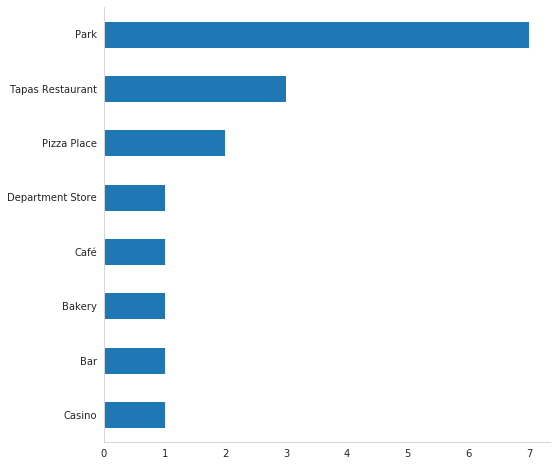

In [67]:
cluster1chart = cluster1df['1st Most Common Venue'].value_counts()[:10].plot(kind='barh')
cluster1chart.invert_yaxis()
cluster1chart.spines['right'].set_visible(False)
cluster1chart.spines['top'].set_visible(False)

Cluster 2

In [68]:
cluster2df = madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]
cluster2df

Metro_Name 1st Most Common Venue 2nd Most Common Venue  \
42              FUENCARRAL           Coffee Shop    Spanish Restaurant   
52             TRES OLIVOS                  Café        Cosmetics Shop   
69             PAN BENDITO         Metro Station      Asian Restaurant   
72        ALCORCON CENTRAL       Automotive Shop                Bakery   
73       ALONSO DE MENDOZA               Brewery         Metro Station   
74          ARROYO CULEBRO         Metro Station     Convenience Store   
79                EL CASAR               Brewery         Metro Station   
81          GETAFE CENTRAL                  Café        Breakfast Spot   
83    HOSPITAL DE MOSTOLES                  Café                  Park   
84   HOSPITAL SEVERO OCHOA                  Park                 Plaza   
86         JULIAN BESTEIRO                  Park                 Diner   
90        MANUELA MALASANA                 Plaza                  Park   
98             SAN NICASIO     Indian Restaurant         Metro Station   
137  VILLAVERDE BAJO CRUCE         Metro Station    Spanish Restaurant   
229       ESTADIO OLIMPICO   Sporting Goods Shop              Beer Bar   
231        GARCIA NOBLEJAS                  Park           Supermarket   
239                  PITIS    Spanish Restaurant         Metro Station   
247                HENARES         Metro Station         Grocery Store   
248   HOSPITAL DEL HENARES               Brewery    Spanish Restaurant   
249                 JARAMA                  Café                 Plaza   
252    AEROPUERTO T1 T2 T3       Airport Service      Airport Terminal   
289      RIVAS VACIAMADRID           Auto Garage                  Park   

    3rd Most Common Venue 4th Most Common Venue       5th Most Common Venue  
42           Burger Joint                  Café               Metro Station  
52                  Plaza             Wine Shop                Soccer Field  
69           Soccer Field           Yoga Studio           Fish & Chips Shop  
72      Paella Restaurant           Coffee Shop               Metro Station  
73                  Plaza          Dessert Shop                      Garden  
74            Coffee Shop           Pizza Place                 Yoga Studio  
79            Coffee Shop         Train Station                  Hobby Shop  
81          Train Station              Pharmacy                Cocktail Bar  
83       Tapas Restaurant    Spanish Restaurant                   Nightclub  
84                 Garden                   Gym                 Yoga Studio  
86     Spanish Restaurant         Metro Station                 Coffee Shop  
90                   Café  Gym / Fitness Center               Metro Station  
98                  Plaza           Supermarket              Farmers Market  
137             Pet Store           Bus Station                        Café  
229    Seafood Restaurant                  Park               Metro Station  
231                  Café                 Plaza              Breakfast Spot  
239         Train Station               Dog Run  Financial or Legal Service  
247           Pizza Place      Basketball Court                 Coffee Shop  
248         Metro Station                  Café                 Fish Market  
249               Theater      Basketball Court                        Park  
252        Duty-free Shop                  Café              Airport Lounge  
289         Metro Station          Soccer Field                 Yoga Studio

We visualize the most common venue types in Cluster 2

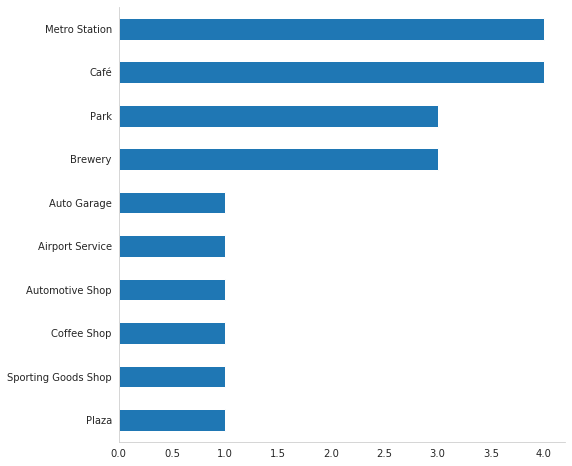

In [69]:
cluster2chart = cluster2df['1st Most Common Venue'].value_counts()[:10].plot(kind='barh')
cluster2chart.invert_yaxis()
cluster2chart.spines['right'].set_visible(False)
cluster2chart.spines['top'].set_visible(False)

Cluster 3

In [70]:
cluster3df = madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]
cluster3df

Metro_Name     1st Most Common Venue  \
1                   ALVARADO        Spanish Restaurant   
2               ANTON MARTIN        Spanish Restaurant   
3                     ATOCHA                Restaurant   
4               ATOCHA RENFE                     Hotel   
5                      BAMBU               Coffee Shop   
6                     BILBAO                Restaurant   
8                  CHAMARTIN                      Café   
10            CUATRO CAMINOS        Spanish Restaurant   
11                  ESTRECHO        Spanish Restaurant   
12                  GRAN VIA                     Hotel   
13                   IGLESIA        Spanish Restaurant   
16           MENENDEZ PELAYO        Spanish Restaurant   
19                  PACIFICO        Spanish Restaurant   
20        PINAR DE CHAMARTIN        Spanish Restaurant   
21         PLAZA DE CASTILLA        Spanish Restaurant   
24                RIOS ROSAS        Spanish Restaurant   
26                       SOL                     Hotel   
27                    TETUAN        Spanish Restaurant   
28           TIRSO DE MOLINA        Spanish Restaurant   
30             VALDEACEDERAS        Spanish Restaurant   
32         VILLA DE VALLECAS        Spanish Restaurant   
33           ALONSO MARTINEZ                Restaurant   
36                    BEGONA            Sandwich Place   
41                     CUZCO        Spanish Restaurant   
43          GREGORIO MARANON        Spanish Restaurant   
45                      LAGO        Spanish Restaurant   
46        NUEVOS MINISTERIOS            Clothing Store   
48           PLAZA DE ESPANA                     Hotel   
49              PRINCIPE PIO                     Hotel   
50            PUERTA DEL SUR                       Bar   
51         SANTIAGO BERNABEU        Spanish Restaurant   
55    HOSPITAL INFANTA SOFIA        Spanish Restaurant   
57               LA MORALEJA                Restaurant   
58                LAS TABLAS              Burger Joint   
59           MANUEL DE FALLA                      Café   
62           REYES CATOLICOS        Spanish Restaurant   
66          CARABANCHEL ALTO        Spanish Restaurant   
75            CASA DEL RELOJ         Electronics Store   
85         JUAN DE LA CIERVA        Spanish Restaurant   
89            LOS ESPARTALES                      Pool   
91          MOSTOLES CENTRAL        Spanish Restaurant   
92     PARQUE DE LOS ESTADOS        Spanish Restaurant   
96                  PRADILLO        Spanish Restaurant   
100                  ALSACIA        Chinese Restaurant   
101   AVENIDA DE GUADALAJARA                       Bar   
102          BANCO DE ESPANA                     Hotel   
103                    CANAL        Spanish Restaurant   
105                     GOYA        Spanish Restaurant   
107                 LA ELIPA        Spanish Restaurant   
109           MANUEL BECERRA        Spanish Restaurant   
110                NOVICIADO                     Hotel   
111                    OPERA                     Plaza   
112      PRINCIPE DE VERGARA                Restaurant   
113                  QUEVEDO        Spanish Restaurant   
114                   RETIRO                Restaurant   
115             SAN BERNARDO                     Plaza   
116            SANTO DOMINGO                     Hotel   
117                  SEVILLA                     Hotel   
119                   VENTAS        Spanish Restaurant   
120              ALMENDRALES        Spanish Restaurant   
121                ARGUELLES        Spanish Restaurant   
122                   CALLAO                     Hotel   
124                 DELICIAS        Spanish Restaurant   
125              EMBAJADORES                       Bar   
127                 LAVAPIES                       Bar   
128                  LEGAZPI                       Bar   
129                  MONCLOA                Restaurant   
130     PALOS DE LA FRONTERA        Spanish Restaurant   
135        VENTU

We visualize the most common venue types in Cluster 3

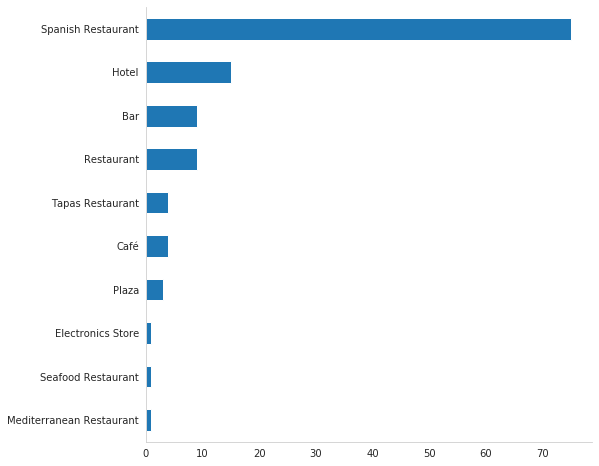

In [71]:
cluster3chart = cluster3df['1st Most Common Venue'].value_counts()[:10].plot(kind='barh')
cluster3chart.invert_yaxis()
cluster3chart.spines['right'].set_visible(False)
cluster3chart.spines['top'].set_visible(False)

Cluster 4

In [72]:
cluster4df = madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]
cluster4df

Metro_Name         1st Most Common Venue  \
9                    CONGOSTO                    Restaurant   
14                   LA GAVIA              Tapas Restaurant   
29                   TRIBUNAL                    Restaurant   
31                VALDECARROS                    Restaurant   
35                      BATAN  Theme Park Ride / Attraction   
44        JOAQUIN VILUMBRALES                           Bar   
56                  LA GRANJA                    Restaurant   
61               MONTECARMELO                 Deli / Bodega   
63   RONDA DE LA COMUNICACION                    Restaurant   
67                 LA FORTUNA                Sandwich Place   
71              SAN FRANCISCO                  Dance Studio   
76              CONSERVATORIO                Clothing Store   
80        FUENLABRADA CENTRAL                         Plaza   
82    HOSPITAL DE FUENLABRADA                Breakfast Spot   
87            LEGANES CENTRAL              Tapas Restaurant   
94              PARQUE LISBOA                    Restaurant   
95               PARQUE OESTE              Department Store   
123     CIUDAD DE LOS ANGELES                    Restaurant   
126    HOSPITAL 12 DE OCTUBRE                 Grocery Store   
133        SAN FERMIN-ORCASUR          Fast Food Restaurant   
150                 HORTALEZA                   Supermarket   
164                    ALUCHE                           Bar   
176        EUGENIA DE MONTIJO                        Bakery   
189               TORRE ARIAS                     Rock Club   
198      CIUDAD UNIVERSITARIA                   Music Venue   
220                     USERA          Fast Food Restaurant   
223                     ASCAO                       Brewery   
237    PARQUE DE LAS AVENIDAS                    Restaurant   
250                 LA RAMBLA                 Shopping Mall   
262          BARRIO DEL PILAR                Clothing Store   
266         DUQUE DE PASTRANA                    Restaurant   
267                  ESTRELLA                           Bar   
272             PACO DE LUCIA                    Restaurant   
274                   PIO XII                    Restaurant   
281                  VENTILLA          Gym / Fitness Center   
283                 VINATEROS                           Bar   
284           ARGANDA DEL REY            Spanish Restaurant   
285                 LA POVEDA                   Music Venue   
287              RIVAS FUTURA                 Shopping Mall   

        2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
9                  Food Truck      Basketball Court             Pet Store   
14              Grocery Store             Pet Store           Supermarket   
29                        Bar          Cocktail Bar                 Plaza   
31                        Bar        Ice Cream Shop         Metro Station   
35                Snack Place            Theme Park            Restaurant   
44                 Restaurant                  Park                Bakery   
56         Spanish Restaurant                   Bar      Basketball Court   
61                Supermarket      Asian Restaurant                Arcade   
63                IT Services             Cafeteria    Spanish Restaurant   
67         Italian Restaurant             Multiplex          Cocktail Bar   
71          Food & Drink Shop                 Hotel           Supermarket   
76                      Plaza           Supermarket                   Gym   
80         Basketball Stadium              Tea Room           Pizza Place   
82                 Restaurant          Burger Joint           Bus Station   
87                      Plaza                Lounge      Kebab Restaurant   
94                       Café                 Plaza         Metro Station   
95          Electronics Store   Sporting Goods Shop  Fast Food Restaurant   
123        Spanish Restaurant      Basketball Court          Burger Joint   
126            Farmers Market    Sp

We visualize the most common venue types in Cluster 4

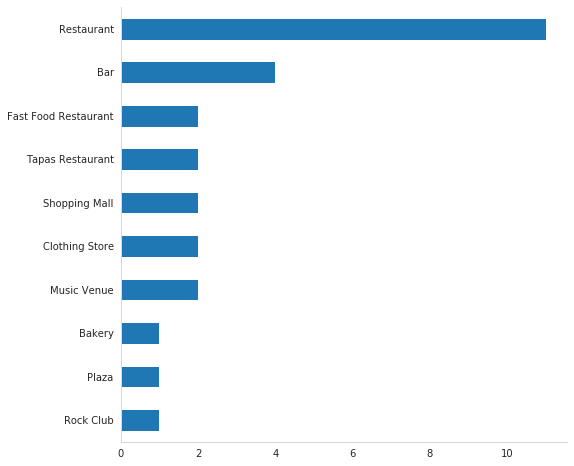

In [73]:
cluster4chart = cluster4df['1st Most Common Venue'].value_counts()[:10].plot(kind='barh')
cluster4chart.invert_yaxis()
cluster4chart.spines['right'].set_visible(False)
cluster4chart.spines['top'].set_visible(False)

Cluster 5

In [74]:
cluster5df = madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]
cluster5df

Metro_Name 1st Most Common Venue 2nd Most Common Venue  \
7               BUENOS AIRES                   Bar         Grocery Store   
17          MIGUEL HERNANDEZ                  Café         Grocery Store   
18            NUEVA NUMANCIA                Bakery                   Pub   
22                  PORTAZGO           Pizza Place         Metro Station   
23        PUENTE DE VALLECAS  Fast Food Restaurant         Grocery Store   
25       SIERRA DE GUADALUPE                Church    Seafood Restaurant   
34         AVIACION ESPANOLA    Spanish Restaurant                   Bar   
37             CASA DE CAMPO  Gym / Fitness Center                   Bar   
39            COLONIA JARDIN         Grocery Store    Spanish Restaurant   
40            CUATRO VIENTOS                   Bar         Metro Station   
68                 LA PESETA                   Bar          Music School   
70            PLAZA ELIPTICA                   Bar                Bakery   
78              EL CARRASCAL                   Bar           Pizza Place   
88                   LORANCA               Brewery           Pizza Place   
108                LAS ROSAS         Grocery Store      Tapas Restaurant   
132            SAN CRISTOBAL         Grocery Store      Tapas Restaurant   
152                MANOTERAS         Grocery Store    Spanish Restaurant   
166               CAMPAMENTO                   Bar   American Restaurant   
168              CARABANCHEL  Fast Food Restaurant         Metro Station   
182                   OPORTO          Concert Hall                 Plaza   
190                    URGEL  Gym / Fitness Center         Grocery Store   
192             VISTA ALEGRE  Fast Food Restaurant         Grocery Store   
193      ALTO DE EXTREMADURA         Grocery Store               Stadium   
197                CARPETANA         Grocery Store        Breakfast Spot   
212                   OPANEL                   Bar          Burger Joint   
224  AVDA. DE LA ILUSTRACION      Tapas Restaurant                Bakery   
238               PENAGRANDE  Gym / Fitness Center    Spanish Restaurant   
260               ARTILLEROS            Restaurant   Fried Chicken Joint   
270               MIRASIERRA                   Gym     Convenience Store   
273                  PAVONES        Breakfast Spot           Bus Station   
277        PUERTA DE ARGANDA         Train Station                Market   
279             SAN CIPRIANO         Grocery Store            Playground   

    3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  
7           Big Box Store           Soccer Stadium         Metro Station  
17     Chinese Restaurant  Fruit & Vegetable Store      Asian Restaurant  
18            Supermarket              Pizza Place          Burger Joint  
22         Soccer Stadium     Fast Food Restaurant     Electronics Store  
23                  Hotel                   Bakery      Tapas Restaurant  
25          Metro Station                      Gym  Fast Food Restaurant  
34      Convenience Store            Metro Station         Train Station  
37          Metro Station               Playground     Fish & Chips Shop  
39          Metro Station             Burger Joint                 Diner  
40          Train Station              Bus Station                  Park  
68            Pizza Place            Metro Station    Spanish Restaurant  
70                  Plaza     Gym / Fitness Center    Seafood Restaurant  
78            Post Office              Flower Shop                   Gym  
88                    Gym            Metro Station        Farmers Market  
108        Breakfast Spot               Restaurant                   Bar  
132        Breakfast Spot         Baseball Stadium          Soccer Field  
152  Gym / Fitness Center                 Pharmacy                  Park  
166  Gym / Fitness Center     Fast Food Restaurant      Tapas Restaurant  
168   Sporting Goods Shop              Comedy Club               Brewery  
182      

We visualize the most common venue types in Cluster 5

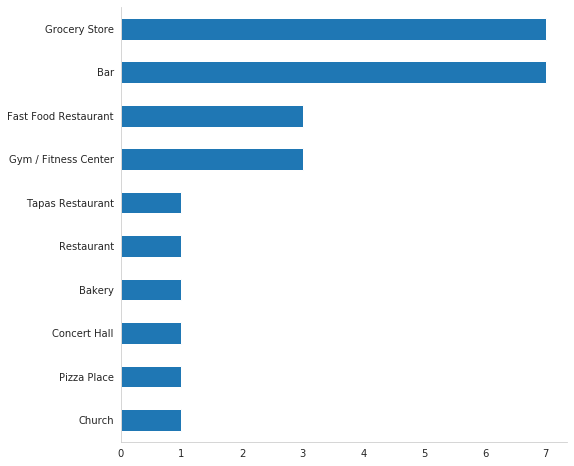

In [75]:
cluster5chart = cluster5df['1st Most Common Venue'].value_counts()[:10].plot(kind='barh')
cluster5chart.invert_yaxis()
cluster5chart.spines['right'].set_visible(False)
cluster5chart.spines['top'].set_visible(False)

Finally, and out of curiosity, let'see how the map would look with less clusters (2,3,4 clusters)

2 clusters map

In [76]:
# set number of clusters
kclusters = 2

madrid_grouped_clustering = madrid_grouped.drop('Metro_Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int32)

In [77]:
# add clustering labels
neighbourhoods_venues_sorted['Cluster Labels'] = kmeans.labels_

madrid_merged = metro_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighbourhoods_venues_sorted.set_index('Metro_Name'), on='Metro_Name')

madrid_merged.head() # check the last columns!

Metro_Line       Metro_Name  Longitude   Latitude  Cluster Labels  \
0          1  ALTO DEL ARENAL  -3.645225  40.389769               1   
1          1         ALVARADO  -3.703318  40.450331               0   
2          1     ANTON MARTIN  -3.699376  40.412463               0   
3          1           ATOCHA  -3.692491  40.408847               0   
4          1     ATOCHA RENFE  -3.689380  40.406586               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Bar             BBQ Joint           Pizza Place   
1    Spanish Restaurant                Bakery            Restaurant   
2    Spanish Restaurant                   Bar                 Hotel   
3            Restaurant                 Hotel    Spanish Restaurant   
4                 Hotel    Spanish Restaurant            Restaurant   

  4th Most Common Venue 5th Most Common Venue  
0                  Café                  Park  
1                   Bar         Grocery Store  
2            Restaurant                  Café  
3                  Café                Garden  
4         Grocery Store         Train Station

In [78]:
madrid_merged ['Cluster Labels'] = madrid_merged ['Cluster Labels'].fillna(0)
madrid_merged ['Cluster Labels'] = madrid_merged ['Cluster Labels'].astype(int)

In [79]:
# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster, first, second,third in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Metro_Name'], madrid_merged['Cluster Labels'],madrid_merged['1st Most Common Venue'], madrid_merged['2nd Most Common Venue'], madrid_merged['3rd Most Common Venue']):
    popup='{} // Cluster number: {} // Most common venue: {} // 2nd most common venue: {} // 3rd most common venue: {}'.format(
        str(poi),
        str(cluster),
        str(first),
        str(second),
        str(third))
    label = folium.Popup(popup, max_width=1500, parse_html=True)
   
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

3 clusters

In [80]:
# set number of clusters
kclusters = 3

madrid_grouped_clustering = madrid_grouped.drop('Metro_Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 1, 1, 2, 1, 0, 0, 1], dtype=int32)

In [81]:
# add clustering labels
neighbourhoods_venues_sorted['Cluster Labels'] = kmeans.labels_

madrid_merged = metro_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighbourhoods_venues_sorted.set_index('Metro_Name'), on='Metro_Name')

madrid_merged.head() # check the last columns!

Metro_Line       Metro_Name  Longitude   Latitude  Cluster Labels  \
0          1  ALTO DEL ARENAL  -3.645225  40.389769               1   
1          1         ALVARADO  -3.703318  40.450331               0   
2          1     ANTON MARTIN  -3.699376  40.412463               0   
3          1           ATOCHA  -3.692491  40.408847               1   
4          1     ATOCHA RENFE  -3.689380  40.406586               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Bar             BBQ Joint           Pizza Place   
1    Spanish Restaurant                Bakery            Restaurant   
2    Spanish Restaurant                   Bar                 Hotel   
3            Restaurant                 Hotel    Spanish Restaurant   
4                 Hotel    Spanish Restaurant            Restaurant   

  4th Most Common Venue 5th Most Common Venue  
0                  Café                  Park  
1                   Bar         Grocery Store  
2            Restaurant                  Café  
3                  Café                Garden  
4         Grocery Store         Train Station

In [82]:
madrid_merged ['Cluster Labels'] = madrid_merged ['Cluster Labels'].fillna(0)
madrid_merged ['Cluster Labels'] = madrid_merged ['Cluster Labels'].astype(int)

In [83]:
# create map
map_clusters3 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster, first, second,third in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Metro_Name'], madrid_merged['Cluster Labels'],madrid_merged['1st Most Common Venue'], madrid_merged['2nd Most Common Venue'], madrid_merged['3rd Most Common Venue']):
    popup='{} // Cluster number: {} // Most common venue: {} // 2nd most common venue: {} // 3rd most common venue: {}'.format(
        str(poi),
        str(cluster),
        str(first),
        str(second),
        str(third))
    label = folium.Popup(popup, max_width=1500, parse_html=True)
   
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters3)
       
map_clusters3

4 clusters

In [84]:
# set number of clusters
kclusters = 4

madrid_grouped_clustering = madrid_grouped.drop('Metro_Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 3, 3, 2, 3, 3, 3, 0], dtype=int32)

In [85]:
# add clustering labels
neighbourhoods_venues_sorted['Cluster Labels'] = kmeans.labels_

madrid_merged = metro_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighbourhoods_venues_sorted.set_index('Metro_Name'), on='Metro_Name')

madrid_merged.head() # check the last columns!

Metro_Line       Metro_Name  Longitude   Latitude  Cluster Labels  \
0          1  ALTO DEL ARENAL  -3.645225  40.389769               0   
1          1         ALVARADO  -3.703318  40.450331               3   
2          1     ANTON MARTIN  -3.699376  40.412463               3   
3          1           ATOCHA  -3.692491  40.408847               3   
4          1     ATOCHA RENFE  -3.689380  40.406586               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Bar             BBQ Joint           Pizza Place   
1    Spanish Restaurant                Bakery            Restaurant   
2    Spanish Restaurant                   Bar                 Hotel   
3            Restaurant                 Hotel    Spanish Restaurant   
4                 Hotel    Spanish Restaurant            Restaurant   

  4th Most Common Venue 5th Most Common Venue  
0                  Café                  Park  
1                   Bar         Grocery Store  
2            Restaurant                  Café  
3                  Café                Garden  
4         Grocery Store         Train Station

In [86]:
madrid_merged ['Cluster Labels'] = madrid_merged ['Cluster Labels'].fillna(0)
madrid_merged ['Cluster Labels'] = madrid_merged ['Cluster Labels'].astype(int)

In [87]:
# create map
map_clusters4 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster, first, second,third in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Metro_Name'], madrid_merged['Cluster Labels'],madrid_merged['1st Most Common Venue'], madrid_merged['2nd Most Common Venue'], madrid_merged['3rd Most Common Venue']):
    popup='{} // Cluster number: {} // Most common venue: {} // 2nd most common venue: {} // 3rd most common venue: {}'.format(
        str(poi),
        str(cluster),
        str(first),
        str(second),
        str(third))
    label = folium.Popup(popup, max_width=1500, parse_html=True)
   
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters4)
       
map_clusters4

That's it! I hope you enjoyed reading this project as much as a I doing it! For further questions, please do not hesitate to reach out!